In [356]:
%matplotlib inline

import seaborn as sns
import numpy as np
from numpy import array 

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA

from collections import Counter
from collections import defaultdict

from sklearn import tree
import scikitplot as skplt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets

import scikitplot as skplt
from sklearn.model_selection import cross_val_predict
from sklearn.manifold import TSNE

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### DF_TRAIN

In [357]:
df = pd.read_csv("df_RFE_train.csv")
df = df.drop(columns = ["Unnamed: 0"])
df = df.drop(columns = ["fBodyAccJerk-bandsEnergy()-1,16"])
df.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.407747,0.376314,0.660790,-0.140840,0.892055,0.124660,0.977436,-0.123213,-0.970905,-0.745449,...,-0.993756,-0.983163,-0.991975,-1.0,-0.257549,-0.948870,-0.998285,-0.990697,0.179941,5
1,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,-0.196359,...,-0.999372,-0.973770,-0.984923,-1.0,-0.048167,-0.975777,-0.999472,-0.996399,0.180289,5
2,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,-0.329023,...,-0.998158,-0.963072,-0.985351,-1.0,-0.216685,-0.985594,-0.999807,-0.995127,0.180637,5
3,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,-0.295036,...,-0.997404,-0.987275,-0.987874,-1.0,0.216862,-0.983524,-0.999770,-0.995237,0.181935,5
4,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,-0.166693,...,-0.999277,-0.980848,-0.990373,-1.0,-0.153343,-0.992324,-0.999873,-0.995465,0.185151,5


In [358]:
df_binary = df.copy()

In [359]:
df_binary["label"] = df_binary["label"].map({1:1,
                                 2:0,
                                 3:0,
                                 4:0,
                                 5:0,
                                 6:0})

In [360]:
df_binary["label"].value_counts()

0    6126
1    1226
Name: label, dtype: int64

### DF_TEST


In [361]:
df_test= pd.read_csv("df_RFE_test.csv")
df_test = df_test.drop(columns = ["Unnamed: 0"])
df_test = df_test.drop(columns = ["fBodyAccJerk-bandsEnergy()-1,16"])
df_test.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.168084,0.076989,-0.709003,-0.282719,0.906083,0.152895,0.944461,-0.262160,-0.864621,-0.795468,...,-0.968424,-0.940137,-0.958325,-1.0,0.184035,-0.726707,-0.953984,-0.907308,0.276801,5
1,-0.302437,-0.104983,0.399177,-0.289215,0.856176,0.152895,0.944461,-0.262160,-0.858163,-0.745687,...,-0.993051,-0.974357,-0.987087,-1.0,0.018109,-0.960680,-0.998476,-0.938212,0.281343,5
2,-0.617916,0.305653,0.279786,-0.287513,0.856269,0.139454,0.948704,-0.261661,-0.859947,-0.231640,...,-0.995082,-0.983773,-0.975581,-1.0,-0.479145,-0.977176,-0.999570,-0.983273,0.280083,5
3,-0.749578,-0.063792,0.544916,-0.293396,0.856269,0.136124,0.947309,-0.272916,-0.853713,-0.233036,...,-0.997495,-0.987887,-0.979580,-1.0,-0.496954,-0.976796,-0.999504,-0.985843,0.284114,5
4,-0.590576,0.235151,0.457718,-0.302961,0.853942,0.133541,0.946221,-0.279190,-0.843378,-0.493331,...,-0.995932,-0.972039,-0.975105,-1.0,-0.427502,-0.975706,-0.999500,-0.990572,0.290722,5


In [30]:
l = [('fBodyAccJerk-sma()', 0.5033990187488347),
 ('fBodyAcc-meanFreq()-Z', 0.04137779664217798),
 ('fBodyBodyGyroMag-maxInds', 0.040409144444020814),
 ('tGravityAcc-min()-Y', 0.02785290956485616),
 ('tGravityAcc-arCoeff()-Z,4', 0.026412991384708727),
 ('tGravityAcc-std()-X', 0.02499998093333352),
 ('tGravityAcc-max()-Y', 0.021013830810512498),
 ('fBodyAcc-max()-X', 0.02024876702099725),
 ('tBodyAccMag-std()', 0.015630894133601102),
 ('fBodyGyro-bandsEnergy()-1,8', 0.014566322848836969),
 ('fBodyAcc-mad()-Z', 0.012466679426372907)]

l2 = []
l3 =[]
for el in l:
    l2.append(list(el))

for i in range(len(l2)):
    if l2[i][0] in df_test.columns:
        l3.append(l2[i][0])


        

['tGravityAcc-min()-Y', 'tGravityAcc-arCoeff()-Z,4', 'fBodyAcc-max()-X']

In [362]:
df_test_binary = df_test.copy()

In [363]:
df_test_binary["label"] = df_test_binary["label"].map({1:1,
                                 2:0,
                                 3:0,
                                 4:0,
                                 5:0,
                                 6:0})

In [364]:
df_test_binary["label"].value_counts()

0    2451
1     496
Name: label, dtype: int64

In [365]:
attributes = [col for col in df_test.columns if col != 'label']

X_train = df_binary[attributes].values
y_train = np.array(df_binary['label'])
X_test = df_test_binary[attributes].values
y_test = np.array(df_test_binary['label'])

C:\Users\daddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Classes')

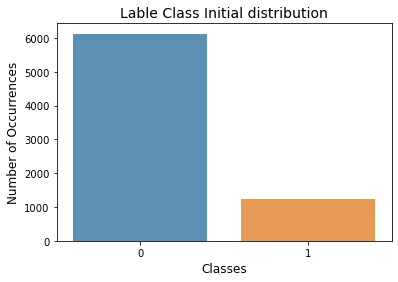

In [366]:
label = df_binary.label.value_counts()
plt.figure()
sns.barplot(label.index, label.values, alpha=0.8)
plt.title('Lable Class Initial distribution',fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

In [48]:
from imblearn.datasets import make_imbalance

In [49]:

print(f'Distribution before imbalancing: {Counter(y_train)}')

X_res, y_res = make_imbalance(X_train, y_train,
                              sampling_strategy={0:4067,1:200},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res)}')


Distribution before imbalancing: Counter({0: 4067, 1: 3285})
Distribution after imbalancing: Counter({0: 4067, 1: 200})


In [50]:
X_res.shape

(4267, 28)

C:\Users\daddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Classes')

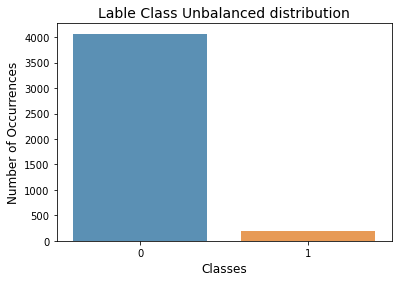

In [51]:
imbal_dict = {0:4067,1:200}
imbal_dict_X = list(imbal_dict.keys())
imbal_dict_y = list(imbal_dict.values())

sns.barplot(imbal_dict_X , imbal_dict_y, alpha=0.8)
plt.title('Lable Class Unbalanced distribution',fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

# 

# Decision Tree Unbalanced  - TEST_SET 

In [385]:
dt_max_depth = [2,3,5,6,7,10,12, None]
dt_min_samples_split = randint(2, 51)
min_samples_leaf = randint(1, 51)
criterion = ["entropy", "gini"]
splitter = ["best", "random"]
max_features = [None, 2, 3, 4, 5]

dt_param_grid = {
    "max_depth": dt_max_depth,
    "min_samples_split": dt_min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "criterion": criterion,
    "splitter": splitter,
    "max_features": max_features
            }

dt_grid = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=dt_param_grid,
                            scoring=make_scorer(accuracy_score))

In [386]:
dt_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 10, 12,
                                                      None],
                                        'max_features': [None, 2, 3, 4, 5],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B1EF30AAC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B1EF368D00>,
                                        'splitter': ['best', 'random']},
                   scoring=make_scorer(accuracy_score))

In [387]:
print(dt_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 34, 'min_samples_split': 9, 'splitter': 'best'}


In [395]:
decision_tree = tree.DecisionTreeClassifier(**dt_grid.best_params_).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9440108585001696
F1-score [0.96648385 0.83007209]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2451
           1       0.85      0.81      0.83       496

    accuracy                           0.94      2947
   macro avg       0.91      0.89      0.90      2947
weighted avg       0.94      0.94      0.94      2947



# 

# KNN Unbalanced - TEST_SET

In [79]:
k_range = range(1,11)
knn_metrics = ['euclidean', 'manhattan']

knn_param_grid = {
    'n_neighbors': k_range,
    'metric': knn_metrics
            }

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, scoring='accuracy')
knn_grid.fit(X_res, y_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 11)},
             scoring='accuracy')

In [80]:
print('Accuracy: ' + str(knn_grid.best_score_))
print('Parameters: ' + str(knn_grid.best_params_))

Accuracy: 1.0
Parameters: {'metric': 'euclidean', 'n_neighbors': 1}


In [384]:
knn = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2451
           1       0.88      0.94      0.90       496

    accuracy                           0.97      2947
   macro avg       0.93      0.95      0.94      2947
weighted avg       0.97      0.97      0.97      2947



## CondensedNearestNeighbour

In [232]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1, n_neighbors= 3)
X_res_cnn, y_res_cnn = cnn.fit_resample(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res_cnn))

Resampled dataset shape Counter({1: 80, 2: 28, 3: 19, 5: 10, 4: 9, 6: 8})


In [233]:
clf_cnn = DecisionTreeClassifier(**dt_grid.best_params_)
clf_cnn.fit(X_res_cnn, y_res_cnn)

y_pred_cnn = clf_cnn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_cnn))
print('F1-score %s' % f1_score(y_test, y_pred_cnn, average=None))
print(classification_report(y_test, y_pred_cnn))

Accuracy 0.43094672548354257
F1-score [0.73193047 0.         0.74531422 0.         0.44425887 0.        ]
              precision    recall  f1-score   support

           1       0.67      0.81      0.73       496
           2       0.00      0.00      0.00       471
           3       0.69      0.80      0.75       420
           4       0.00      0.00      0.00       491
           5       0.29      1.00      0.44       532
           6       0.00      0.00      0.00       537

    accuracy                           0.43      2947
   macro avg       0.27      0.44      0.32      2947
weighted avg       0.26      0.43      0.31      2947



C:\Users\daddu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daddu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daddu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


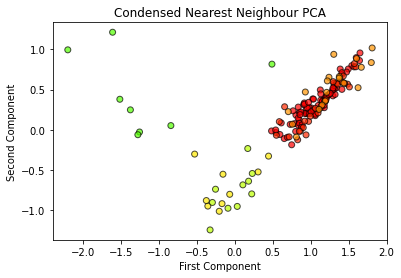

In [234]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_cnn)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_cnn, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("Condensed Nearest Neighbour PCA")
plt.ylabel("Second Component", fontsize=10)
plt.xlabel("First Component", fontsize=10)
plt.show()

## SMOTE

In [57]:
sm = SMOTE(random_state = 42)
X_res_smote, y_res_smote = sm.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res_smote))

Resampled dataset shape Counter({0: 4067, 1: 4067})


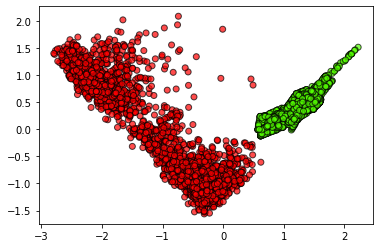

In [59]:
pca_smote = PCA(n_components=2)
pca_smote.fit(X_train)
X_pca_smote = pca_smote.transform(X_res_smote)

plt.scatter(X_pca_smote[:, 0], X_pca_smote[:, 1], c=y_res_smote, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [237]:
clf_smote = DecisionTreeClassifier(**dt_grid.best_params_)
clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_smote))
print('F1-score %s' % f1_score(y_test, y_pred_smote, average=None))
print(classification_report(y_test, y_pred_smote))

Accuracy 0.7879199185612488
F1-score [0.75882353 0.69276394 0.67837541 0.76938776 0.7879925  1.        ]
              precision    recall  f1-score   support

           1       0.74      0.78      0.76       496
           2       0.78      0.62      0.69       471
           3       0.63      0.74      0.68       420
           4       0.77      0.77      0.77       491
           5       0.79      0.79      0.79       532
           6       1.00      1.00      1.00       537

    accuracy                           0.79      2947
   macro avg       0.79      0.78      0.78      2947
weighted avg       0.79      0.79      0.79      2947

